## Business understanding

### Introduction
Imagine walking about 4 miles for a few litres of questionable water? Then imagine doing that on a daily basis basis. Such is the situation for about [24 million Tanzanians](https://lifewater.org/blog/tanzania-water-crisis-facts/). This water poverty has led to serious illnesses, high infant mortality, unproductive agricultural conditions and slumped economies.

In Tanzania, heterogeneous climate and geology contribute to significant seasonal, interannual, and geographic variability in water availability and water quality challenges. In addition, water supply challenges continues to become a huge issue due to meeting increased water demand associated with agricultural expansion and intensification and the need for improved access for domestic needs, including safe drinking water.Other key sectors fueling demand for surface and groundwater include  animal husbandry, hydropower,and mining, while environmental flow requirements are also generally high due to the significant coverage of key nature reserves.

Water being an essential need of life, the Government of Tanzania, Non Governmental Organizations, agencies and individuals have come up with waterwells to provide clean water for years. In rural areas, these water wells may be the only source of potable water and they are a lifeline for the inhabitants, but how effective are they? This project combines machine learning techniques with data visualization to point out potential causes of malfunctioning projects, identify possible success of potential projects, and redirect funds to the places where they are in dire need and can be spent most efficiently.
### Problem Statement
[About half of Tanzanians face water poverty](https://lifewater.org/blog/tanzania-water-crisis-facts/) and many waterpoints have been built to cater for the problem of water scarcity. However,these water points sometimes cease to function and therefore need an overhaul.

The government of Tanzania has tasked The Miner League  to identify wells that are functional ,those that need repairs and non functional wells. Identifying these wells provides a chance for the government to repair these wells that are faulty and properly manage  functional wells.The Miner League is to come up with a classification model to predict whether a well is functional,non functional or needing repairs.

### Project Justification
Aside from the lucky few who reside near the great lakes of Tanzania, [the majority whom are living under the $1.25 poverty line and lack access to basic water supply](https://nycdatascience.com/blog/student-works/linlin_cheng_proj_5/) have to trek for miles to access water, a cumbersome task that falls  to women and young girls, who should otherwise be in school. This leads to long term decrease of robustness in the future generations.

Further, [most of this water is contaminated causing many waterborne diseases](https://lifewater.org/blog/tanzania-water-crisis-facts/) that then cause high mortality among the population. With all this in mind, the Government of Tanzania aims to provide easily accessible water to the population and ensure that the technologies used are well maintained for long term use

### Objectives

- To predict the condition of a waterpoint pump based on the geographical location
- To predict the condition of a waterpoint pump based on age
- To predict the duration a water pump is likely to last depending on water quality
- To find patterns in non-functional waterpoint to influence how new waterpoints are built
- To identify waterpoints needing repair
- To identify which installer results in the most nonfunctional waterpoints pumps
- To identify effect of waterquality on water pumps
- To identify how the extraction type affects water pumps
- To identify how the age of the waterpump affects the functionality


### Business success criteria

The Ministry of Water under the Government of Tanzania will use our model to:
- identify geographical locations where a pump is likely to fail
- successfully show how water quality affects pumping used
- improve maintenance operations in functioning waterpoints


### Project success criteria

- Accuracy Score : 70%
- Precision Score : 80%
- Recall Score : 75%
- F1 Score : 79%

## 2.0 Data understanding

#### 2.1 Data Description

In [75]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
# Viewing the Tanzania dataset 
data=pd.read_csv('Miner League Data/Train_set_values.csv')
data.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [77]:
pd.read_csv('Miner League Data/column_description.csv')

,Column_name,Description
0,date_recorded,The date the row was entered
1,funder,Who funded the well
2,gps_height,Altitude of the well
3,installer,Organization that installed the well
4,longitude,GPS coordinate
5,latitude,GPS coordinate
6,wpt_name,Name of the waterpoint if there is one
7,num_private,Number of private waterpoints
8,basin,Geographic water basin
9,subvillage,Geographic location


In [78]:
data.tail()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,...,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,...,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,...,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,...,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump
59399,26348,0.0,2011-03-23,World Bank,191,World,38.104048,-6.747464,Kwa Mzee Lugawa,0,...,on failure,salty,salty,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump


In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [80]:
#Reading data that shows the status group of a waterpoint pump
data2=pd.read_csv('Miner League Data/Train_set_labels.csv')
data2.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [81]:
data2.tail()

,id,status_group
59395,60739,functional
59396,27263,functional
59397,37057,functional
59398,31282,functional
59399,26348,functional


In [82]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            59400 non-null  int64 
 1   status_group  59400 non-null  object
dtypes: int64(1), object(1)
memory usage: 928.2+ KB


In [83]:
data2.status_group.value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

In [84]:
# Merging data and data2 into one dataframe
main_df=data.join(data2.set_index('id'),on='id')
main_df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [85]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [86]:
main_df.shape

(59400, 41)

In [87]:
main_df.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


###### Observations
the construction_year, amount_tsh and population column appears to have a big number of 0s

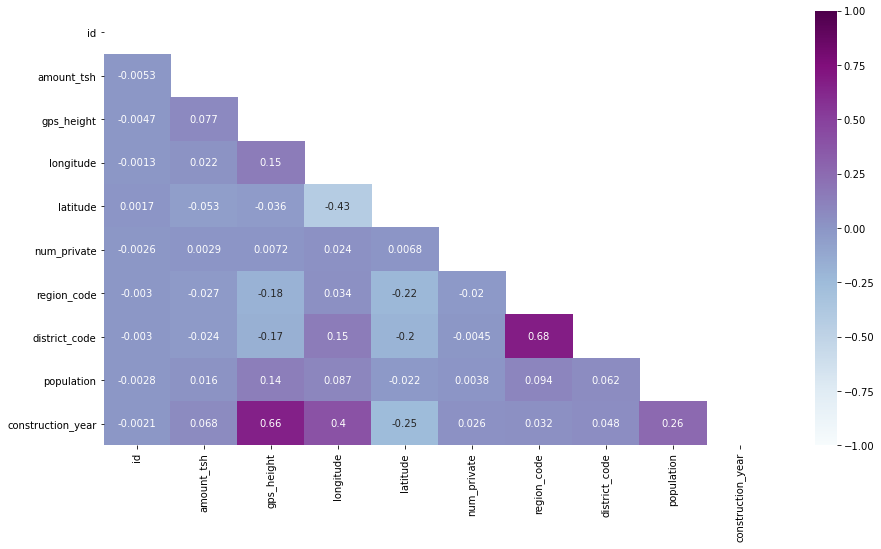

In [88]:
fig,ax  = plt.subplots(figsize=(15,8))
mask = np.triu(np.ones_like(main_df.corr(), dtype=np.bool))
sns.heatmap(data=main_df.corr(),center=0,vmin=-1,vmax=1,annot=True,mask=mask,cmap=sns.color_palette("BuPu", as_cmap=True));
#plt.savefig("images/price heatmap correlation");

In [89]:
# a neat fix is to use stack and a subset to return only the highly correlated pairs.
df=main_df.corr().abs().stack().reset_index().sort_values(0, ascending=False)
df['pairs'] = list(zip(df.level_0, df.level_1))
df.set_index(['pairs'], inplace = True)
df.drop(columns=['level_1', 'level_0'], inplace = True)
df.columns = ['cc']
df.drop_duplicates(inplace=True)

In [90]:
#correlations are considered high with an absolute value of 0.7-0.8 or higher
df[(df.cc>0.7) & (df.cc <1)]


,cc
pairs,


The correlation shows that there are no variables that are highly correlated to each other

## 3.0 Data preparation

In this section, we selected the features relevant to our analysis.

Then grouped them into categorical and numerical columns. The numerical columns selected are:
1. `amount_tsh`

2. `gps_height` 

3. `population`

4. `longitude` 

5. `latitude`

6. `construction_year`

The categorical columns are:

1. `funder` 

2. `installer` 

3. `date_recorded`

4. `basin` 

5. `region`

6. `scheme_management`

7. `extraction_type_class`

8. `payment`

9. `water_quality` 

10. `quantity` 

11. `source_type` 

12. `waterpoint_type_group`

13. `status_group`





##### 3.1.1 Creating a dataframe for selected columns

In [91]:
tz_df = main_df.loc[:, ['amount_tsh', 'gps_height', 'funder', 'installer', 'population', 'longitude',
                 'latitude','date_recorded', 'construction_year','basin', 'region', 
                   'scheme_management', 'extraction_type_class',
                  'payment', 'water_quality', 'quantity', 'source_type', 'waterpoint_type_group', 'status_group']]

tz_df.head()

,amount_tsh,gps_height,funder,installer,population,longitude,latitude,date_recorded,construction_year,basin,region,scheme_management,extraction_type_class,payment,water_quality,quantity,source_type,waterpoint_type_group,status_group
0,6000.0,1390,Roman,Roman,109,34.938093,-9.856322,2011-03-14,1999,Lake Nyasa,Iringa,VWC,gravity,pay annually,soft,enough,spring,communal standpipe,functional
1,0.0,1399,Grumeti,GRUMETI,280,34.698766,-2.147466,2013-03-06,2010,Lake Victoria,Mara,Other,gravity,never pay,soft,insufficient,rainwater harvesting,communal standpipe,functional
2,25.0,686,Lottery Club,World vision,250,37.460664,-3.821329,2013-02-25,2009,Pangani,Manyara,VWC,gravity,pay per bucket,soft,enough,dam,communal standpipe,functional
3,0.0,263,Unicef,UNICEF,58,38.486161,-11.155298,2013-01-28,1986,Ruvuma / Southern Coast,Mtwara,VWC,submersible,never pay,soft,dry,borehole,communal standpipe,non functional
4,0.0,0,Action In A,Artisan,0,31.130847,-1.825359,2011-07-13,0,Lake Victoria,Kagera,NaN,gravity,never pay,soft,seasonal,rainwater harvesting,communal standpipe,functional


In [92]:
tz_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             59400 non-null  float64
 1   gps_height             59400 non-null  int64  
 2   funder                 55765 non-null  object 
 3   installer              55745 non-null  object 
 4   population             59400 non-null  int64  
 5   longitude              59400 non-null  float64
 6   latitude               59400 non-null  float64
 7   date_recorded          59400 non-null  object 
 8   construction_year      59400 non-null  int64  
 9   basin                  59400 non-null  object 
 10  region                 59400 non-null  object 
 11  scheme_management      55523 non-null  object 
 12  extraction_type_class  59400 non-null  object 
 13  payment                59400 non-null  object 
 14  water_quality          59400 non-null  object 
 15  qu

In [93]:
#categorical columns
categorical_cols = tz_df.select_dtypes(include='object').columns
categorical_cols

Index(['funder', 'installer', 'date_recorded', 'basin', 'region',
       'scheme_management', 'extraction_type_class', 'payment',
       'water_quality', 'quantity', 'source_type', 'waterpoint_type_group',
       'status_group'],
      dtype='object')

In [94]:
#changing object into category
for i in categorical_cols:
    tz_df[i] = tz_df[i].astype('category')

In [95]:
#numerical columns
numerical_cols = tz_df.select_dtypes(include='number').columns
numerical_cols

Index(['amount_tsh', 'gps_height', 'population', 'longitude', 'latitude',
       'construction_year'],
      dtype='object')

In [96]:
#changing amount_tsh to integer
tz_df['amount_tsh'] = tz_df['amount_tsh'].astype('int64')
tz_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   amount_tsh             59400 non-null  int64   
 1   gps_height             59400 non-null  int64   
 2   funder                 55765 non-null  category
 3   installer              55745 non-null  category
 4   population             59400 non-null  int64   
 5   longitude              59400 non-null  float64 
 6   latitude               59400 non-null  float64 
 7   date_recorded          59400 non-null  category
 8   construction_year      59400 non-null  int64   
 9   basin                  59400 non-null  category
 10  region                 59400 non-null  category
 11  scheme_management      55523 non-null  category
 12  extraction_type_class  59400 non-null  category
 13  payment                59400 non-null  category
 14  water_quality          59400 non-null 

In [97]:
tz_df.shape

(59400, 19)

## 3.2 Data Cleaning 

This section involves:

1.Checking for duplicates. Here we decided to drop the duplicates

2.Checking for missing values. We created a function to identifying with missing values

3.Checking for outliers

### 3.2.1 Dealing with duplicates

In [98]:
#checking for duplicates
tz_df.duplicated().sum()

688

In [99]:
# drop the duplicated values
tz_df.drop_duplicates(inplace=True)

#checking for any duplicates
tz_df.duplicated().sum()

0

All duplicates were dropped

### 3.2.2 Missing value Treatment

In [100]:
#function for identifying with missing values
def missing_values(data):
    """
    Identify the missing values and their percentages
    Drop values that have no missing values
    Return only dara with missing values
    """
    miss_val = data.isna().sum().sort_values(ascending = False)
    percentage = (data.isna().sum() / len(data)).sort_values(ascending = False)
    missing_values = pd.DataFrame({"Missing Values": miss_val, "In Percentage": percentage})
    missing_values.drop(missing_values[missing_values["In Percentage"] == 0].index, inplace=True)
    return missing_values

In [101]:
#calling the function
missing_values(tz_df)

,Missing Values,In Percentage
scheme_management,3854,0.065642
installer,3653,0.062219
funder,3633,0.061878


scheme management,installer, funder columns have missing values

In [102]:
#dropping the rows of the other columns with missing values
tz_df = tz_df.dropna()
tz_df.head()

,amount_tsh,gps_height,funder,installer,population,longitude,latitude,date_recorded,construction_year,basin,region,scheme_management,extraction_type_class,payment,water_quality,quantity,source_type,waterpoint_type_group,status_group
0,6000,1390,Roman,Roman,109,34.938093,-9.856322,2011-03-14,1999,Lake Nyasa,Iringa,VWC,gravity,pay annually,soft,enough,spring,communal standpipe,functional
1,0,1399,Grumeti,GRUMETI,280,34.698766,-2.147466,2013-03-06,2010,Lake Victoria,Mara,Other,gravity,never pay,soft,insufficient,rainwater harvesting,communal standpipe,functional
2,25,686,Lottery Club,World vision,250,37.460664,-3.821329,2013-02-25,2009,Pangani,Manyara,VWC,gravity,pay per bucket,soft,enough,dam,communal standpipe,functional
3,0,263,Unicef,UNICEF,58,38.486161,-11.155298,2013-01-28,1986,Ruvuma / Southern Coast,Mtwara,VWC,submersible,never pay,soft,dry,borehole,communal standpipe,non functional
5,20,0,Mkinga Distric Coun,DWE,1,39.172796,-4.765587,2011-03-13,2009,Pangani,Tanga,VWC,submersible,pay per bucket,salty,enough,other,communal standpipe,functional


In [103]:
#confirming if there any missing values
missing_values(tz_df)

,Missing Values,In Percentage


All missing values were successfully treated

### Feature Engineering

In [104]:
tz_df['construction_year'].value_counts()

0       16324
2008     2515
2009     2392
2010     2330
2000     1503
2007     1484
2006     1381
2003     1214
2011     1172
2004     1059
1978     1021
2002     1009
2012      998
2005      942
1999      922
1995      892
1998      867
1985      804
1984      722
1982      699
1972      692
1994      682
1990      654
1996      640
1974      639
1992      612
1980      595
1997      533
1993      526
1988      500
2001      496
1983      467
1975      425
1986      403
1976      378
1991      305
1970      304
1989      303
1987      285
1981      221
1977      186
1973      184
1979      173
2013      165
1971      128
1963       84
1967       83
1968       76
1969       59
1960       45
1964       40
1962       28
1961       21
1965       19
1966       16
Name: construction_year, dtype: int64

In [105]:
#finding the median of years != 0
#replace the 0s in construction year with that median
median = tz_df.construction_year[tz_df.construction_year != 0].median()
tz_df.construction_year.replace(0, median, inplace=True)



In [106]:
#create a new column decade
tz_df['decade'] = tz_df['construction_year'] 

In [107]:
#binning the construction year into decade
tz_df['decade'].replace(to_replace = (1960,1961,1962,1963,1964,1965,1966,1967,1968,1969),
                        value ='60s' , inplace=True)
tz_df['decade'].replace(to_replace = (1970,1971,1972,1973,1974,1975,1976,1977,1978,1979),
                        value ='70s' , inplace=True)
tz_df['decade'].replace(to_replace = (1980,1981,1982,1983,1984,1985,1986,1987,1988,1989),
                        value ='80s' , inplace=True)
tz_df['decade'].replace(to_replace = (1990,1991,1992,1993,1994,1995,1996,1997,1998,1999),
                        value ='90s' , inplace=True)
tz_df['decade'].replace(to_replace = (2000,2001,2002,2003,2004,2005,2006,2007,2008,2009),
                        value ='00s' , inplace=True)
tz_df['decade'].replace(to_replace = (2010,2011,2012,2013),
                        value ='10s' , inplace=True)

In [108]:
tz_df['decade'].value_counts()

00s    30319
90s     6633
80s     4999
10s     4665
70s     4130
60s      471
Name: decade, dtype: int64

In [109]:
#changing date to date time object
tz_df['date_recorded']=pd.to_datetime(tz_df['date_recorded'])
tz_df['year_recorded']=tz_df['date_recorded'].apply(lambda x: x.year)

tz_df.drop('date_recorded', axis=1, inplace=True)


In [110]:
# feature engineering a new colum 
tz_df['Age'] = tz_df['year_recorded']- tz_df['construction_year']
tz_df

,amount_tsh,gps_height,funder,installer,population,longitude,latitude,construction_year,basin,region,...,extraction_type_class,payment,water_quality,quantity,source_type,waterpoint_type_group,status_group,decade,year_recorded,Age
0,6000,1390,Roman,Roman,109,34.938093,-9.856322,1999,Lake Nyasa,Iringa,...,gravity,pay annually,soft,enough,spring,communal standpipe,functional,90s,2011,12
1,0,1399,Grumeti,GRUMETI,280,34.698766,-2.147466,2010,Lake Victoria,Mara,...,gravity,never pay,soft,insufficient,rainwater harvesting,communal standpipe,functional,10s,2013,3
2,25,686,Lottery Club,World vision,250,37.460664,-3.821329,2009,Pangani,Manyara,...,gravity,pay per bucket,soft,enough,dam,communal standpipe,functional,00s,2013,4
3,0,263,Unicef,UNICEF,58,38.486161,-11.155298,1986,Ruvuma / Southern Coast,Mtwara,...,submersible,never pay,soft,dry,borehole,communal standpipe,non functional,80s,2013,27
5,20,0,Mkinga Distric Coun,DWE,1,39.172796,-4.765587,2009,Pangani,Tanga,...,submersible,pay per bucket,salty,enough,other,communal standpipe,functional,00s,2011,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59394,500,351,World Bank,ML appro,89,37.634053,-6.124830,2007,Wami / Ruvu,Morogoro,...,submersible,pay monthly,soft,enough,borehole,communal standpipe,non functional,00s,2011,4
59395,10,1210,Germany Republi,CES,125,37.169807,-3.253847,1999,Pangani,Kilimanjaro,...,gravity,pay per bucket,soft,enough,spring,communal standpipe,functional,90s,2013,14
59396,4700,1212,Cefa-njombe,Cefa,56,35.249991,-9.070629,1996,Rufiji,Iringa,...,gravity,pay annually,soft,enough,river/lake,communal standpipe,functional,90s,2011,15
59398,0,0,Malec,Musa,0,35.861315,-6.378573,2000,Rufiji,Dodoma,...,handpump,never pay,soft,insufficient,shallow well,hand pump,functional,00s,2011,11


In [111]:
tz_df.describe()

,amount_tsh,gps_height,population,longitude,latitude,construction_year,year_recorded,Age
count,51217.000000,51217.000000,51217.000000,51217.000000,5.121700e+04,51217.000000,51217.000000,51217.000000
mean,349.372786,708.914052,182.980905,34.507423,-5.706283e+00,1997.916610,2011.935588,14.018978
std,2820.438025,696.674407,479.993076,5.552392,2.877913e+00,10.437236,0.959571,10.497658
min,0.000000,-90.000000,0.000000,0.000000,-1.164944e+01,1960.000000,2002.000000,-7.000000
25%,0.000000,0.000000,0.000000,33.151330,-8.223294e+00,1995.000000,2011.000000,7.000000
50%,0.000000,490.000000,40.000000,35.152189,-4.996336e+00,2000.000000,2012.000000,11.000000
75%,35.000000,1341.000000,217.000000,37.353301,-3.326436e+00,2005.000000,2013.000000,17.000000
max,250000.000000,2770.000000,30500.000000,40.323402,-2.000000e-08,2013.000000,2013.000000,53.000000


In [112]:
#updating categorical columns to exclude those dropped earlier
categorical_cols = tz_df.select_dtypes(include='object').columns
categorical_cols


#Finding the value counts in the categorical data
def count_values(s):
    return s.value_counts(normalize=True).reset_index(name='count').assign(col=s.name)

pd.concat([count_values(tz_df[c]) for c in categorical_cols])

,index,count,col
0,00s,0.591971,decade
1,90s,0.129508,decade
2,80s,0.097604,decade
3,10s,0.091083,decade
4,70s,0.080637,decade
5,60s,0.009196,decade


### 3.2.3 Dealing with outliers

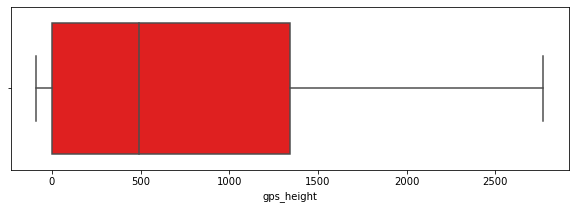

In [113]:
#checking for outliers
fig,ax=plt.subplots(figsize=(10,3))
sns.boxplot(x='gps_height',data=tz_df,color='red')
plt.title('')
plt.show()

There were no outliers

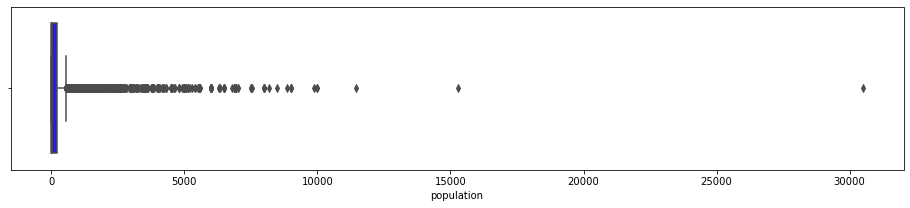

In [114]:
plt.subplots(figsize = (16, 3))
sns.boxplot(x = 'population', data = tz_df, color = 'blue');


The outliers represent natural variations in the population, and they should be left as is in your dataset

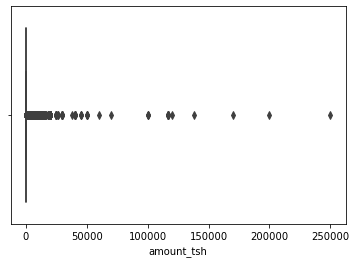

In [115]:
sns.boxplot(x = 'amount_tsh',data=tz_df);

## Exploratory Data Analysis

### 1. Univariate Analysis

Univariate is a common term that you use in statistics to describe a type of data that contains only one attribute or characteristic.

In this analysis, we only take one variable, summarise it and find patterns in its data against its value counts. We will start with categorical then finish with numerical data.

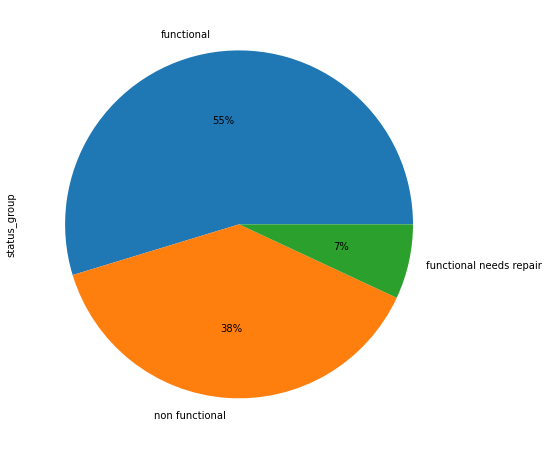

In [118]:
fig, ax = plt.subplots(figsize=(12,8))
tz_df['status_group'].value_counts().plot(kind='pie', autopct='%.0f%%');

55% of waterpoints are functional, 38% are non-functional, 7% are functional and need repair

In [124]:
#function to display count plots of the selected column
def count_plot(data,column):
    plt.figure(figsize=(10,6))
    sns.countplot(x=column,data=data, order = data[column].value_counts().index)
    plt.title(f"{column} count plot")
    plt.ylabel('Count')
    plt.xticks(rotation = 45)
    plt.show()

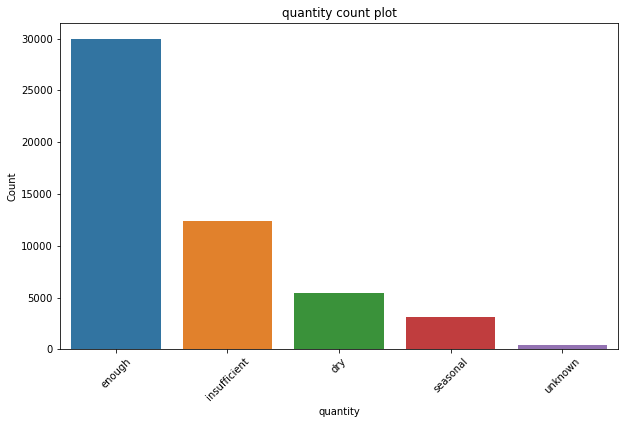

In [125]:
count_plot(tz_df, 'quantity')

The highest number of waterpoints have enough water, then the rest have insufficient, dry, seasonal and unknown quantities respectively.

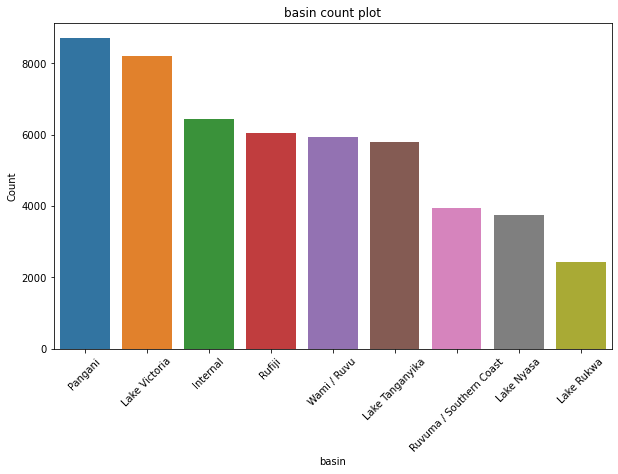

In [126]:
count_plot(tz_df, 'basin')

Most waterpoints draw their water from Pangani basin followed by Lake Victoria basin.

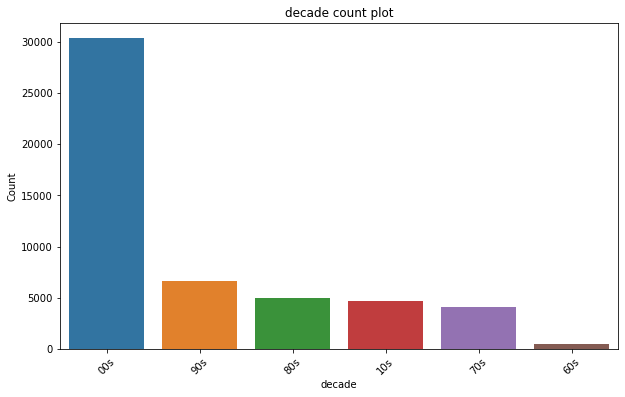

In [127]:
count_plot(tz_df, 'decade')

Most waterpoints were constructed in the 2000's, in the 1960's there were the least waterpoints constructed. Is it because of the funding? population increase? or climate change.

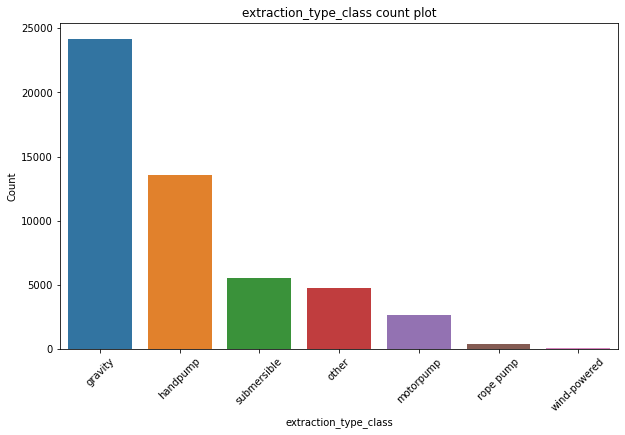

In [128]:
count_plot(tz_df, 'extraction_type_class')

Most waterpoints use pumps that extract water gravity wise, handpumps come as a close second while the wind powered pumps are the least popular. The gravity water pumps may hint at the geographical layout of the land and hand pumps may indicate they are cost-efficienct

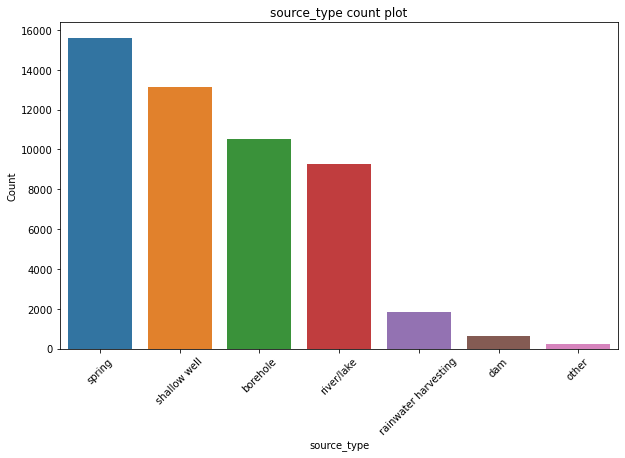

In [129]:
count_plot(tz_df, 'source_type')

springs are most common source of water for waterpoints,
followed by shallow wells, boreholes,rivers/lakes, rainwater harvesting, dams and others respectively

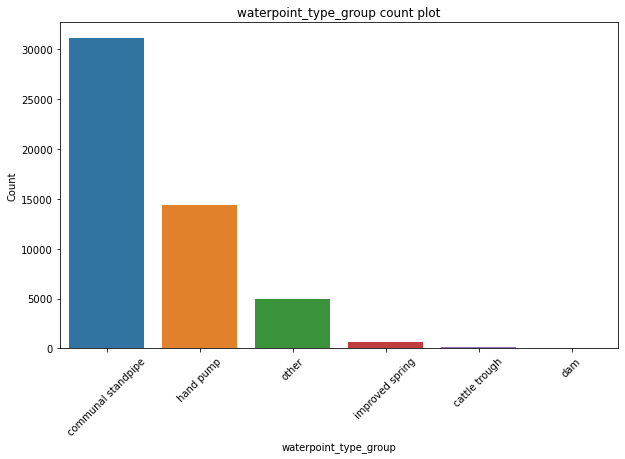

In [359]:
count_plot(tz_df, 'waterpoint_type_group')

The most common kinds of waterpoints are communal standpipes. Handpump kind of waterpoints are also common.

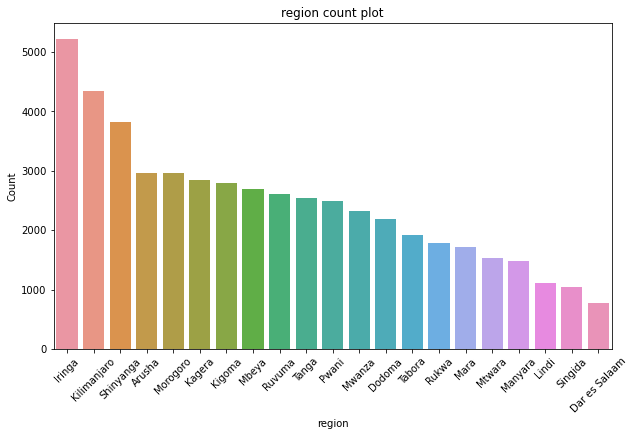

In [132]:
count_plot(tz_df, 'region')

Iringa, Kilimanjaro, Shinyanga, Arusha and Morogoro are the top 5 regions with the most waterpoints

##### Numerical columns

In [171]:
def hist_plot(data,column):
    plt.hist(data=data, x=column)
    plt.title(f"Distribution of {column}")
    plt.figsize=(12,8)
    plt.show()
     

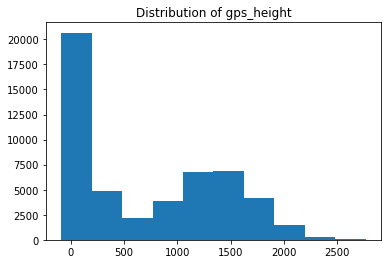

In [172]:
hist_plot(tz_df, 'gps_height')

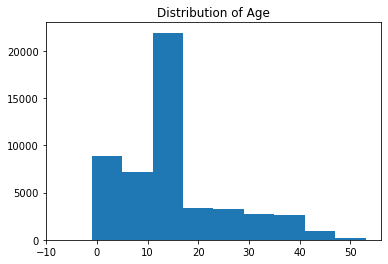

In [173]:
hist_plot(tz_df, 'Age')

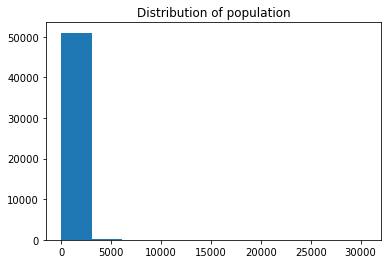

In [174]:
hist_plot(tz_df, 'population')

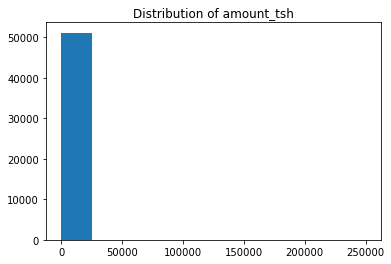

In [175]:
hist_plot(tz_df, 'amount_tsh')